In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 8.4 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -10
MAX_VALUE = 10
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np

def sumXExp2(x):
  sumX = 0  
  for value in x:
    sumX += np.power(value, 2)
  return sumX

def sumSinExp2Modx(x):
  sumX = 0
  for value in x:
    sumX += pow(np.sin(np.sqrt(abs(value))),2)
  return sumX

def term1Left(x):
  sum = 0
  for value in x:
    sum += pow(np.sin(value),2) - np.exp(-(sumXExp2(x)))
  return sum

def xinSheYangN4(x):
  value = term1Left(x) * np.exp(-(sumSinExp2Modx(x)))
  return (value,)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", xinSheYangN4)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg     	std      	min       	max    
0  	30    	0.063799	0.0714082	0.00385618	0.34315
1  	187   	0.0194854	0.0142792	0.00375783	0.0618846
2  	183   	0.00841368	0.00616551	0.00302429	0.0329877
3  	180   	0.00424723	0.00210987	0.00136128	0.00996421
4  	181   	0.00230177	0.0010506 	0.00117613	0.00496654
5  	179   	0.00149622	0.00052584	0.000663672	0.00253201
6  	183   	0.0011936 	0.000533011	0.000329622	0.00250251
7  	178   	0.000716361	0.000303419	0.000250666	0.00125795
8  	179   	0.00045547 	0.00016306 	0.000232153	0.00102239
9  	176   	0.000300651	8.08475e-05	0.000148339	0.000444775
10 	185   	0.000240451	5.56452e-05	0.000141161	0.000382103
11 	183   	0.000200988	3.27608e-05	0.00010915 	0.000273464
12 	185   	0.000171768	3.05913e-05	0.00010915 	0.000219143
13 	173   	0.000142204	2.52503e-05	0.000100994	0.000182546
14 	181   	0.000121315	1.8024e-05 	9.80887e-05	0.000180763
15 	177   	0.000101713	1.32058e-05	7.37967e-05	0.000115985
16 	179   	9.27775e-05	1.21159e-05	7.37967e-

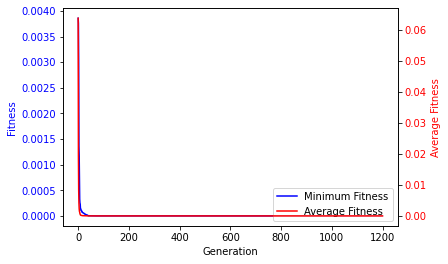

Best individual is Individual('d', [-3.1414846540991066, -3.1414135573458704, 3.140858494533606, -3.141959305451862, -3.1405215688685484, -3.142561105344625, 3.1407991487190157, 3.1405510278312456, 3.1430339957508266, -3.1417702307666633]), fitness: (4.492443131603317e-10,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0456406	0.0415305	0.00278951	0.200098
1  	178   	0.0148383	0.0107411	0.00138171	0.0436309
2  	175   	0.00637232	0.00438326	0.00105787	0.0199722
3  	178   	0.00327992	0.00183862	0.00117165	0.0104495
4  	179   	0.00172574	0.000710382	0.000363828	0.00315935
5  	177   	0.00130488	0.000486965	0.000363828	0.00233708
6  	179   	0.000783819	0.00034039 	0.000206201	0.0018149 
7  	181   	0.000492173	0.000230663	0.000206201	0.000951533
8  	180   	0.000302212	8.37857e-05	0.000187005	0.000609745
9  	175   	0.000242812	5.0287e-05 	0.00016768 	0.000363828
10 	175   	0.000200086	3.15908e-05	0.00016768 	0.000315602
11 	173   	0.000181467	1.59672e-05	0.000155929	0.000206

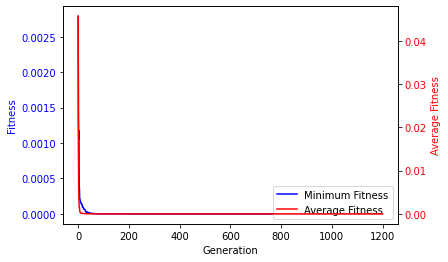

Best individual is Individual('d', [-3.1415328095159265, -3.1407283459543165, -3.1413186167837095, 3.143465294373705, 3.1411746785925354, 3.1418739962965936, 3.14190844336371, -3.1410493395582217, -3.1414795305350234, 3.136567629093]), fitness: (2.04975246569325e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0650491	0.0722718	0.00390626	0.290373
1  	184   	0.0216363	0.0155746	0.00292089	0.0569069
2  	183   	0.010094 	0.00662268	0.00204283	0.0259379
3  	180   	0.00405606	0.00268719	0.00204283	0.0146272
4  	171   	0.00225624	0.000530005	0.000568112	0.00307649
5  	182   	0.00175574	0.000582172	0.00050749 	0.00268788
6  	183   	0.00116153	0.000467584	0.000359045	0.00223102
7  	176   	0.0007677 	0.000266125	0.000359045	0.00140967
8  	183   	0.00053677	0.000169604	0.000188655	0.000931418
9  	185   	0.000346704	8.99145e-05	0.000188655	0.000518437
10 	178   	0.000276959	8.12644e-05	0.000153712	0.000490929
11 	183   	0.000204686	4.68206e-05	0.000153712	0.000359039
12 	181

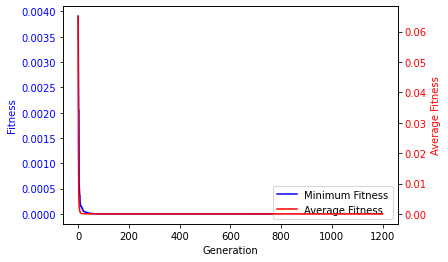

Best individual is Individual('d', [3.141365641512401, -3.1423327615564594, 3.141036976236971, -3.1417250656894917, -3.1416246744297585, 3.1429273702166447, -3.140923213543561, 3.142564276299285, -3.1415778241225527, 3.1437287651662804]), fitness: (5.877093745560108e-10,)
gen	nevals	avg      	std     	min       	max     
0  	30    	0.0536438	0.073254	0.00460211	0.304687
1  	180   	0.0145329	0.013183	0.00292305	0.0631143
2  	180   	0.00564796	0.00296862	0.00198603	0.0186179
3  	182   	0.00364213	0.00182259	0.000763425	0.00879953
4  	177   	0.0020501 	0.0011087 	0.000615087	0.0047343 
5  	182   	0.00124099	0.000671952	0.000350781	0.0030074 
6  	181   	0.000774917	0.000380555	0.000199749	0.00162283
7  	171   	0.000511148	0.000187895	0.000213444	0.000868062
8  	174   	0.000366154	0.000138564	0.000168267	0.000790503
9  	180   	0.000277046	6.40991e-05	0.000168267	0.000417266
10 	180   	0.000226604	3.75438e-05	0.000164878	0.000322339
11 	187   	0.00019225 	2.99213e-05	0.000113451	0.000243313


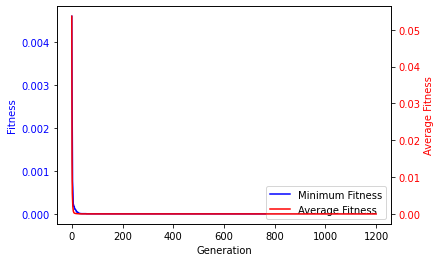

Best individual is Individual('d', [-3.1419941327322216, 3.141440385040653, 3.142695666300376, -3.141733054944351, 3.1415787356347447, -3.141357171994695, -3.1416294612546847, -3.1415759281404845, -3.142410615001258, -3.141354469207131]), fitness: (1.4946609631509731e-10,)
gen	nevals	avg      	std      	min     	max     
0  	30    	0.0601675	0.0650112	0.004148	0.276606
1  	176   	0.0232685	0.0178077	0.00643898	0.0735392
2  	183   	0.0104808	0.00681157	0.00329012	0.0314645
3  	181   	0.00538812	0.00308773	0.00192186	0.0168782
4  	177   	0.00317508	0.00104785	0.00138919	0.0053303
5  	180   	0.0019831 	0.000776054	0.000709785	0.00414062
6  	181   	0.00142406	0.000630614	0.000603598	0.00378118
7  	186   	0.000959527	0.000379109	0.000589144	0.0017898 
8  	179   	0.00064547 	9.35736e-05	0.000469269	0.000842141
9  	182   	0.00056832 	7.89379e-05	0.000463506	0.000791211
10 	178   	0.000504442	4.99921e-05	0.000396471	0.000589144
11 	186   	0.000431451	4.92387e-05	0.000327745	0.000527559
12 	188

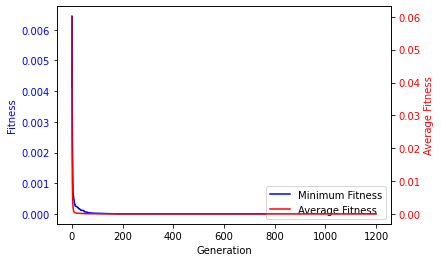

Best individual is Individual('d', [3.141528949515645, 3.1414917532558935, 3.1412773738088844, 3.14153696100432, 3.141671754254699, 3.1417668571976174, 3.140268823963516, 3.1411396189202363, -0.00023721341601934398, 3.1415974098634685]), fitness: (3.836126201233031e-10,)


In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    

    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))   


    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()